<a href="https://colab.research.google.com/github/NicoProsser/Statistic-and-Datamining/blob/main/Project_Mushroom_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended



Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


Data Cleaning - Clean typical errors (Ex. Duplicates) in your Dataset (20%)

Data Analysis - Apply Univariate & Bivariate analysis techniques. Answer 10 self defined questions. These question should be relevant to your problem. Describe what knowledge you gained in your analysis. Use the Markdown option in Google Colab (40%)

Data Modeling - Define a supervised learning tasks from you data. This could be either Regression or Classification. Describe what you have tried. You can use the algorithms, which we used in our lecture but you are free to use any supervised learning algorithm. Scikit-Learn documentation is excellent and offer a huge collection of algorithms you can experiment with. https://scikit-learn.org/stable/index.html (40%)

In [45]:
!wget https://www.spataru.at/students/course_files/stdm/mushrooms.csv

--2024-01-20 12:56:32--  https://www.spataru.at/students/course_files/stdm/mushrooms.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/csv]
Saving to: ‘mushrooms.csv.2’

mushrooms.csv.2     100%[===================>] 365.24K   727KB/s    in 0.5s    

2024-01-20 12:56:33 (727 KB/s) - ‘mushrooms.csv.2’ saved [374003/374003]



# Libs

In [46]:
import pandas as pd

# Data Preprocessing

In [47]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [48]:
# In order for the NN to work
def replace_with_sequence(df):
    new_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for col in new_df.columns:
        # Create a dictionary to map unique values to their corresponding index
        value_index_map = {value: index for index, value in enumerate(new_df[col].unique())}

        # Replace values in the column with their index
        new_df[col] = new_df[col].map(value_index_map)

    return new_df

In [49]:
# Data Cleaning
new_df = df.drop_duplicates()

In [50]:
# Data Cleaning
new_df = replace_with_sequence(df);

In [51]:
# Check if that worked
new_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [52]:
# All of this is part of
# Preperation for the NN
import torch
import torch.nn as nn
import torch.nn.functional as F

In [53]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( 4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=22, h1=8, h2=9, h3=4, out_features=2): #out_features = 2 -> edible or not | the rest are in_features
    super().__init__() # instantiate the nn.Module
    self.fc1 = nn.Linear(in_features, h1) # fc = fully-connected
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # rectified linear unit | push it into the first layer
    x = F.relu(self.fc2(x)) # push it into the second layer
    x = F.relu(self.fc3(x))
    x = self.out(x) # push it to the output layer
    return x

In [54]:
# Pick a manual seed for randomization
torch.manual_seed(5)
# Create an instance of model
model = Model()

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# for later printing the graph

In [56]:
# Train Test Split Set X, y
X = new_df.drop('class', axis = 1)
y = new_df['class']

In [57]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [60]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [61]:
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
# Set the criterion of model to measure the error, how far off the rpedictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer -> Adam Optimizer | lr = learning rate (if error doesnt go down after a bunch of iterations (epochs) -> lower lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# model.parameters

In [63]:
# Train the model
# How many Epochs? (one run thru all teh training data in the network)
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation and feed it back to the nn to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss: 0.6990633606910706
Epoch 10 and loss: 0.5991788506507874
Epoch 20 and loss: 0.31818097829818726
Epoch 30 and loss: 0.23618356883525848
Epoch 40 and loss: 0.14386558532714844
Epoch 50 and loss: 0.09025055170059204
Epoch 60 and loss: 0.048936765640974045
Epoch 70 and loss: 0.0223122239112854
Epoch 80 and loss: 0.009631695225834846
Epoch 90 and loss: 0.00461947824805975


**This can be ignored -> old values with 2 hidden layers**


---


Epoch 0 and loss: 0.698687732219696
Epoch 10 and loss: 0.4582105576992035
Epoch 20 and loss: 0.23796245455741882
Epoch 30 and loss: 0.14539849758148193
Epoch 40 and loss: 0.10113213956356049
Epoch 50 and loss: 0.07222401350736618
Epoch 60 and loss: 0.053753845393657684
Epoch 70 and loss: 0.03848306089639664
Epoch 80 and loss: 0.026146577671170235
Epoch 90 and loss: 0.01644846983253956

Text(0.5, 0, 'Epoch')

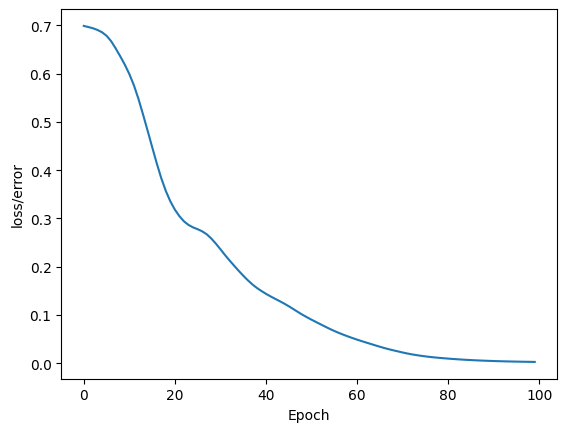

In [64]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [65]:
# Evalute Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss ( eval vs test )

In [66]:
# The last epoch loss and this one are pretty close for me :)
loss
# Old value with 2 hidden layers -> tensor(0.0112)

tensor(0.0035)